Data successfully read from BTC-USD.csv.
Null Values Before Cleaning:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Data cleaned: 0 rows removed.
Data normalized for 'Close' column.
Head of the DataFrame:
         Date          Open          High           Low     Close  \
0  2023-05-30  27745.123047  28044.759766  27588.501953  0.053748   
1  2023-05-31  27700.529297  27831.677734  26866.453125  0.043683   
2  2023-06-01  27218.412109  27346.105469  26671.720703  0.035349   
3  2023-06-02  26824.556641  27303.861328  26574.644531  0.044307   
4  2023-06-03  27252.324219  27317.052734  26958.003906  0.040669   

      Adj Close       Volume  
0  27702.349609  13251081851  
1  27219.658203  15656371534  
2  26819.972656  14678970415  
3  27249.589844  14837415000  
4  27075.128906   8385597470  

Description of the DataFrame:
               Open          High           Low       Close     Adj Close  \
count    367.0

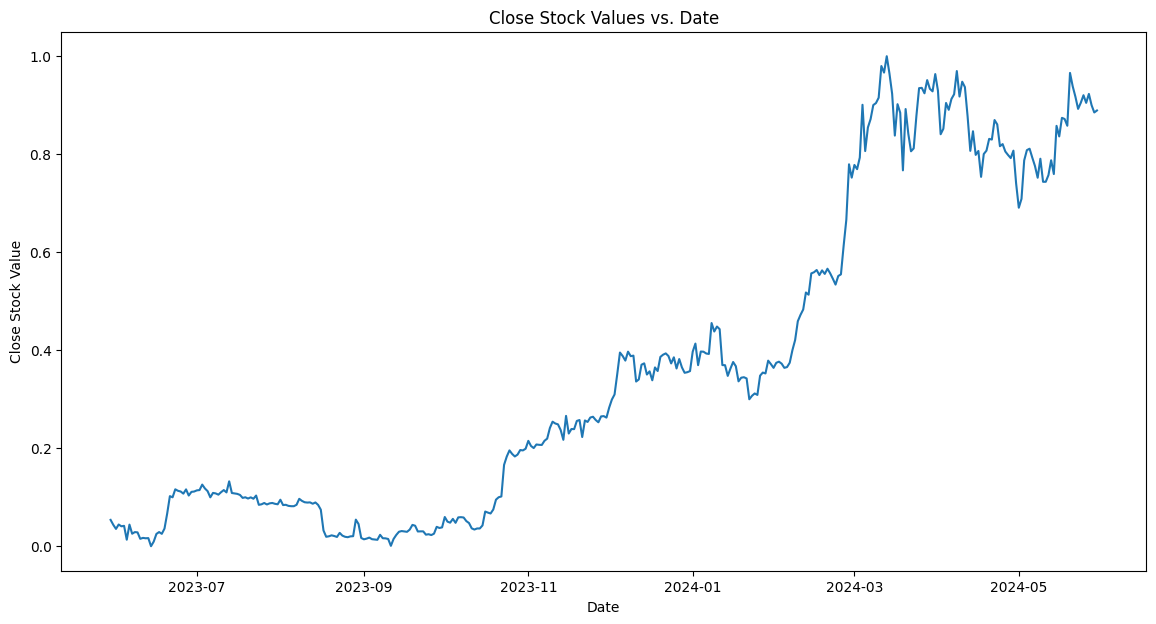

Epoch 1/50
245/245 - 12s - loss: 0.0079 - val_loss: 0.0159 - lr: 0.0010 - 12s/epoch - 50ms/step
Epoch 2/50
245/245 - 8s - loss: 0.0045 - val_loss: 0.0091 - lr: 0.0010 - 8s/epoch - 33ms/step
Epoch 3/50
245/245 - 7s - loss: 0.0038 - val_loss: 0.0465 - lr: 0.0010 - 7s/epoch - 28ms/step
Epoch 4/50
245/245 - 9s - loss: 0.0029 - val_loss: 0.0032 - lr: 0.0010 - 9s/epoch - 37ms/step
Epoch 5/50
245/245 - 7s - loss: 0.0025 - val_loss: 0.0029 - lr: 0.0010 - 7s/epoch - 30ms/step
Epoch 6/50
245/245 - 7s - loss: 0.0029 - val_loss: 0.0031 - lr: 0.0010 - 7s/epoch - 30ms/step
Epoch 7/50
245/245 - 8s - loss: 0.0026 - val_loss: 0.0096 - lr: 0.0010 - 8s/epoch - 32ms/step
Epoch 8/50
245/245 - 7s - loss: 0.0026 - val_loss: 0.0174 - lr: 0.0010 - 7s/epoch - 27ms/step
Epoch 9/50
245/245 - 8s - loss: 0.0023 - val_loss: 0.0046 - lr: 0.0010 - 8s/epoch - 32ms/step
Epoch 10/50
245/245 - 7s - loss: 0.0019 - val_loss: 0.0024 - lr: 0.0010 - 7s/epoch - 27ms/step
Epoch 11/50
245/245 - 8s - loss: 0.0020 - val_loss: 0.002

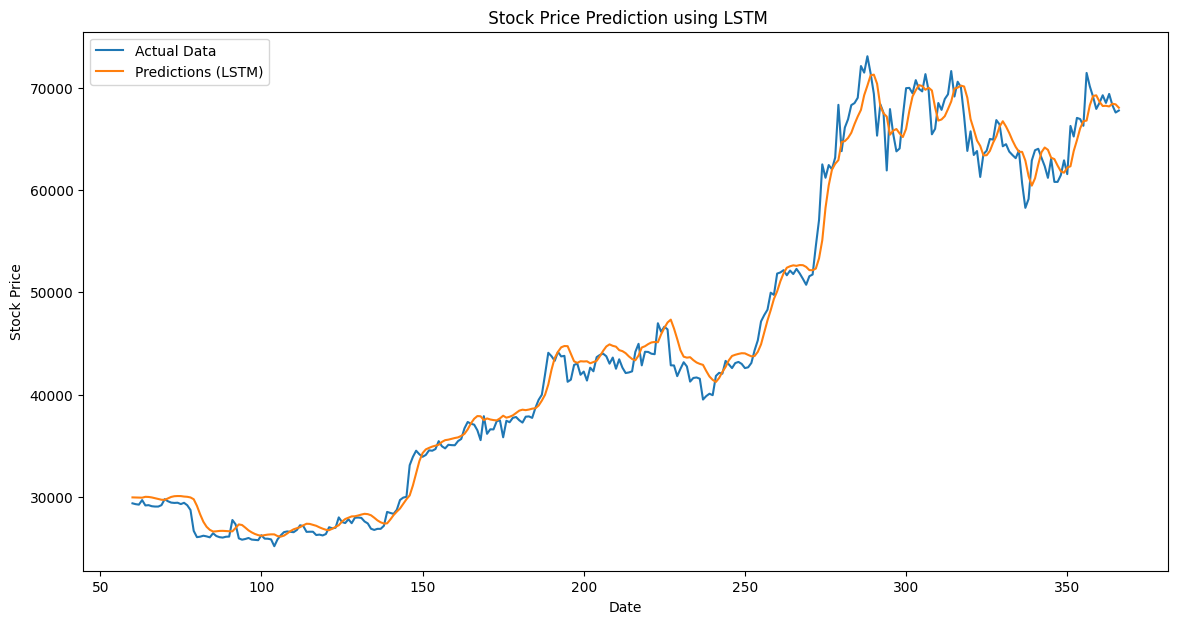

In [22]:


import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


class Data:
    def __init__(self):
        self.dataframe = pd.DataFrame([])

    def read(self, file_name: str):
        """Reads a CSV file into the dataframe."""
        if os.path.exists(file_name):
            self.dataframe = pd.read_csv(file_name)
            print(f"Data successfully read from {file_name}.")
        else:
            print(f"Error: The file {file_name} does not exist.")

    def check_null_values(self):
        """Checks for null values in the dataframe."""
        print("Null Values Before Cleaning:")
        print(self.dataframe.isnull().sum())

    def clean_data(self):
        """Removes null values from the dataframe."""
        initial_shape = self.dataframe.shape
        self.dataframe.dropna(inplace=True)
        final_shape = self.dataframe.shape
        print(f"Data cleaned: {initial_shape[0] - final_shape[0]} rows removed.")

    def normalize(self):
        """Normalizes the 'Close' column in the dataframe."""
        scaler = MinMaxScaler(feature_range=(0, 1))
        self.dataframe['Close'] = scaler.fit_transform(self.dataframe['Close'].values.reshape(-1, 1))
        print("Data normalized for 'Close' column.")
        return scaler

    def visualize(self, y_label):
        """Plots graph for stock values vs. date."""
        if 'Date' in self.dataframe.columns and y_label in self.dataframe.columns:
            self.dataframe['Date'] = pd.to_datetime(self.dataframe['Date'])
            plt.figure(figsize=(14, 7))
            sns.lineplot(data=self.dataframe, x='Date', y=y_label)
            plt.title(f'{y_label} Stock Values vs. Date')
            plt.xlabel('Date')
            plt.ylabel(f'{y_label} Stock Value')
            plt.show()
        else:
            print(f"Dataframe does not contain 'Date' and '{y_label}' columns.")

    def print_head(self):
        """Prints the head of the dataframe."""
        print("Head of the DataFrame:")
        print(self.dataframe.head())

    def print_description(self):
        """Prints the description of the dataframe."""
        print("\nDescription of the DataFrame:")
        print(self.dataframe.describe())


def prepare_data(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)


# Instantiate the Data class and process the data
data_processor = Data()
csv_file_path = 'BTC-USD.csv'  # Replace with the path to your CSV file
data_processor.read(csv_file_path)
data_processor.check_null_values()
data_processor.clean_data()
scaler = data_processor.normalize()
data_processor.print_head()
data_processor.print_description()
data_processor.visualize('Close')

# Use the closing price for modeling
data = data_processor.dataframe['Close'].values.reshape(-1, 1)

# Prepare data for LSTM
look_back = 60
X, y = prepare_data(data, look_back)

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and validation sets
split = int(0.8 * len(X))
X_train, X_val = X[:split], X[split:]
y_train, y_val = y[:split], y[split:]

# Build LSTM model
model_lstm = Sequential([
    LSTM(50, input_shape=(look_back, 1), return_sequences=True),
    Dropout(0.05),
    LSTM(50, return_sequences=False),
    Dropout(0.05),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Callbacks for early stopping and reducing learning rate
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# Train the LSTM model
history = model_lstm.fit(X_train, y_train, epochs=50, batch_size=1,
                         validation_data=(X_val, y_val), callbacks=[early_stopping, reduce_lr], verbose=2)

# Make predictions using LSTM model
train_predictions_lstm = model_lstm.predict(X)
train_predictions_lstm = scaler.inverse_transform(train_predictions_lstm)
y = scaler.inverse_transform(y.reshape(-1, 1))





# Plot the results for LSTM
plt.figure(figsize=(14, 7))
plt.plot(data_processor.dataframe.index[look_back:], y, label='Actual Data')
plt.plot(data_processor.dataframe.index[look_back:], train_predictions_lstm, label='Predictions (LSTM)')
plt.title(' Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
